In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_Spain = df[(df['job_country'] == "Spain") & (df['job_title'] == 'Data Analyst')].copy()
df_DA_Spain['job_posted_month_no'] = df_DA_Spain['job_posted_date'].dt.month
df_spain_skills = df_DA_Spain.explode('job_skills')

In [6]:
df_spain_pivot = df_spain_skills.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_spain_pivot.loc['Total'] = df_spain_pivot.sum()
df_spain_pivot = df_spain_pivot[df_spain_pivot.loc['Total'].sort_values(ascending=False).index]
df_spain_pivot = df_spain_pivot.drop('Total')
df_spain_pivot

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,78,50,37,43,35,21,26,13,9,9,...,0,0,0,0,1,0,0,0,0,0
2,57,49,36,36,25,23,14,13,5,7,...,0,0,0,0,0,1,0,0,0,0
3,54,34,36,20,18,14,10,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,69,40,24,22,26,25,14,10,8,6,...,0,1,0,0,0,0,0,0,1,0
5,58,37,23,25,29,18,16,2,6,4,...,0,0,0,0,0,0,0,0,0,0
6,65,34,37,27,17,12,8,6,4,9,...,0,0,0,0,0,0,0,0,0,0
7,65,48,19,28,25,16,16,6,5,5,...,0,0,1,1,0,0,0,0,0,0
8,90,64,41,41,38,28,18,12,14,11,...,1,0,0,0,0,0,0,0,0,0
9,69,42,29,30,31,17,20,10,21,11,...,0,0,0,0,0,0,0,1,0,0


In [7]:
db_totals = df_DA_Spain.groupby('job_posted_month_no').size()
df_spain_percent = df_spain_pivot.div(db_totals/100,axis=0)
df_spain_percent = df_spain_percent.reset_index()
df_spain_percent['job_posted_month'] = df_spain_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_spain_percent = df_spain_percent.set_index('job_posted_month')
df_spain_percent = df_spain_percent.drop(columns='job_posted_month_no')
df_spain_percent


job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,aws,...,spring,terminal,dynamodb,dplyr,selenium,symphony,symfony,delphi,shell,crystal
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,63.934426,40.983607,30.327869,35.245902,28.688525,17.213115,21.311475,10.655738,7.377049,7.377049,...,0.000000,0.000000,0.000000,0.000000,0.819672,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.818182,44.545455,32.727273,32.727273,22.727273,20.909091,12.727273,11.818182,4.545455,6.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.000000,0.000000
Mar,65.853659,41.463415,43.902439,24.390244,21.951220,17.073171,12.195122,6.097561,2.439024,2.439024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,70.408163,40.816327,24.489796,22.448980,26.530612,25.510204,14.285714,10.204082,8.163265,6.122449,...,0.000000,1.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020408,0.000000
May,66.666667,42.528736,26.436782,28.735632,33.333333,20.689655,18.390805,2.298851,6.896552,4.597701,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.033708,38.202247,41.573034,30.337079,19.101124,13.483146,8.988764,6.741573,4.494382,10.112360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,75.581395,55.813953,22.093023,32.558140,29.069767,18.604651,18.604651,6.976744,5.813953,5.813953,...,0.000000,0.000000,1.162791,1.162791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,65.693431,46.715328,29.927007,29.927007,27.737226,20.437956,13.138686,8.759124,10.218978,8.029197,...,0.729927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,67.647059,41.176471,28.431373,29.411765,30.392157,16.666667,19.607843,9.803922,20.588235,10.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000


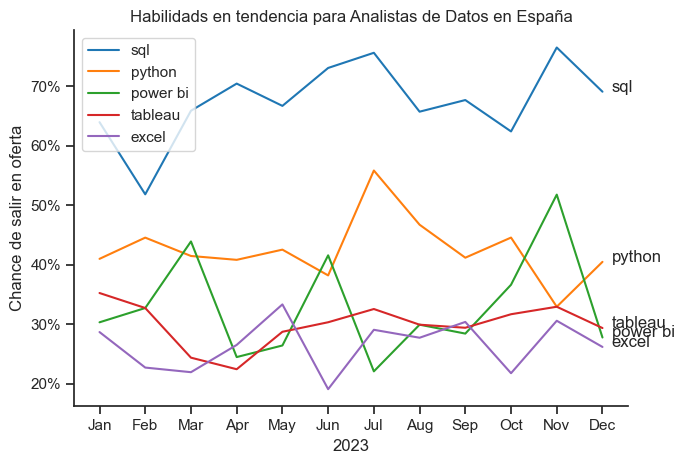

In [10]:
df_plot = df_spain_percent.iloc[:,:5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Habilidads en tendencia para Analistas de Datos en España')
plt.ylabel('Chance de salir en oferta')
plt.xlabel('2023')
plt.legend()
plt.tight_layout()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2 ,df_plot.iloc[-1, i], df_plot.columns[i])